## Importing Libraries

In [56]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

## Importing Data File 

In [57]:
food_data = pd.read_csv('foodstruct_nutritional_facts.csv') 
food_data.head() 

,Food Name,Category Name,Calcium,Calories,Carbs,Cholesterol,Copper,Fats,Fiber,Folate,...,Vitamin D,Vitamin E,Vitamin K,Omega-3 - ALA,Omega-6 - Eicosadienoic acid,Omega-6 - Gamma-linoleic acid,Omega-3 - Eicosatrienoic acid,Omega-6 - Dihomo-gamma-linoleic acid,Omega-6 - Linoleic acid,Omega-6 - Arachidonic acid
0,Acerola,Fruits,12.0,32.0,77.0,0.0,9.0,3.0,11.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Apple,Fruits,6.0,52.0,14.0,0.0,3.0,17.0,24.0,3.0,...,0.0,18.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Apricot,Fruits,13.0,48.0,11.0,0.0,8.0,39.0,2.0,9.0,...,0.0,89.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Dried fruit,Fruits,55.0,241.0,63.0,0.0,34.0,51.0,73.0,10.0,...,0.0,43.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Avocado,Fruits,12.0,160.0,85.0,0.0,19.0,15.0,67.0,81.0,...,0.0,21.0,21.0,11.0,0.0,2.0,NaN,NaN,NaN,NaN


## EDA Part I: Cleaning Data 

In [58]:
# Checking all column names 
food_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1171 entries, 0 to 1170
Data columns (total 59 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Food Name                             1171 non-null   object 
 1   Category Name                         1171 non-null   object 
 2   Calcium                               1146 non-null   float64
 3   Calories                              1171 non-null   float64
 4   Carbs                                 1171 non-null   float64
 5   Cholesterol                           1116 non-null   float64
 6   Copper                                1092 non-null   float64
 7   Fats                                  1171 non-null   float64
 8   Fiber                                 1073 non-null   float64
 9   Folate                                1069 non-null   float64
 10  Iron                                  1151 non-null   float64
 11  Magnesium        

In [59]:
# Checking how many unique food groups fall under the categories column 
food_groups_counts = food_data['Category Name'].value_counts()
food_groups_counts

Category Name
Baked Products                     106
Meat                               100
Sweets                              96
Meals, Entrees, and Side Dishes     90
Vegetables                          90
Fruits                              88
Beverages                           84
Seafood                             83
Soups                               67
Grains                              66
Greens                              60
Dairy                               58
Oils and Sauces                     54
Spices                              46
Fast Foods                          45
Nuts                                27
Mushrooms                            8
Baby Foods                           3
Name: count, dtype: int64

According to the National Institute of Health (NIH) there are 8 major food groups... 
 - Vegetables
 - Fruits
 - Grains
 - Protein Foods 
 - Dairy 
 - Oils and Solid Fats
 - Added Sugars
 - Beverages 

The food_data Categories are not sorted this way so we need to reorganize how things are classified to align them with the NIH food groups. Below is an outline of how the Categories above will be adjusted to suit the NIH classifications. 

| NIH Food Group       | Data Categories                |
|----------------------|---------------------------------|
| Vegetables           | Vegetables, Greens, Mushrooms   |
| Fruits               | Fruits                          |
| Grains               | Grains                          |
| Protein Foods        | Meat, Seafood, Nuts             |
| Dairy                | Dairy                           |
| Oils and Solid Fats  | Oils and Sauces                 |
| Added Sugars         | Baked Products, Sweets          |
| Beverages            | Beverages                       |


Categories that are being filtered out: Baby Foods, Fast Foods, Spices, Soups, Meals, Entrees, and Side Dishes

[Source](https://www.nia.nih.gov/health/healthy-eating-nutrition-and-diet/healthy-eating-you-age-know-your-food-groups#grains)

In [60]:
# Clean and standardize the 'Category Name' column
food_data['Category Name'] = food_data['Category Name'].str.strip().str.title()

# Define the mapping from old categories to NIH Food Groups
category_mapping = {
    'Vegetables': 'Vegetables',
    'Greens': 'Vegetables',
    'Mushrooms': 'Vegetables',
    'Fruits': 'Fruits',
    'Grains': 'Grains',
    'Meat': 'Protein Foods',
    'Seafood': 'Protein Foods',
    'Nuts': 'Protein Foods',
    'Dairy': 'Dairy',
    'Oils': 'Oils and Solid Fats',
    'Sauces': 'Oils and Solid Fats',
    'Baked Products': 'Added Sugars',
    'Sweets': 'Added Sugars',
    'Beverages': 'Beverages'}


# Map the old categories to the new NIH Food Groups
food_data['NIH_Food_Group'] = food_data['Category Name'].map(category_mapping)

# Identify and handle unmapped categories
unmapped = food_data[food_data['NIH_Food_Group'].isnull()]['Category Name'].unique()
if len(unmapped) > 0:
    print('Categories not mapped:')
    print(unmapped)
    # Decide how to handle these categories
    # For example, assign to 'Other'
    food_data['NIH_Food_Group'] = food_data['NIH_Food_Group'].fillna('Other')

# Verify the mapping
print('Mapped NIH Food Groups:')
print(food_data['NIH_Food_Group'].value_counts())

# Save the updated dataset
food_data.to_csv('food_data_nih.csv', index=False)

Categories not mapped:
['Spices' 'Oils And Sauces' 'Soups' 'Fast Foods'
 'Meals, Entrees, And Side Dishes' 'Baby Foods']
Mapped NIH Food Groups:
NIH_Food_Group
Other            305
Protein Foods    210
Added Sugars     202
Vegetables       158
Fruits            88
Beverages         84
Grains            66
Dairy             58
Name: count, dtype: int64


In [61]:
nih_food_data = pd.read_csv('food_data_nih.csv')
nih_food_data.head()

,Food Name,Category Name,Calcium,Calories,Carbs,Cholesterol,Copper,Fats,Fiber,Folate,...,Vitamin E,Vitamin K,Omega-3 - ALA,Omega-6 - Eicosadienoic acid,Omega-6 - Gamma-linoleic acid,Omega-3 - Eicosatrienoic acid,Omega-6 - Dihomo-gamma-linoleic acid,Omega-6 - Linoleic acid,Omega-6 - Arachidonic acid,NIH_Food_Group
0,Acerola,Fruits,12.0,32.0,77.0,0.0,9.0,3.0,11.0,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fruits
1,Apple,Fruits,6.0,52.0,14.0,0.0,3.0,17.0,24.0,3.0,...,18.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fruits
2,Apricot,Fruits,13.0,48.0,11.0,0.0,8.0,39.0,2.0,9.0,...,89.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fruits
3,Dried fruit,Fruits,55.0,241.0,63.0,0.0,34.0,51.0,73.0,10.0,...,43.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fruits
4,Avocado,Fruits,12.0,160.0,85.0,0.0,19.0,15.0,67.0,81.0,...,21.0,21.0,11.0,0.0,2.0,NaN,NaN,NaN,NaN,Fruits


In [62]:
# We are going to move the NIH Food Groups column to the 2nd position to the left
# Get the list of columns
columns = nih_food_data.columns.tolist()

# Remove 'NIH_Food_Group' from its current position
columns.remove('NIH_Food_Group')

# Insert 'NIH_Food_Group' at position 1 (after the first column)
columns.insert(1, 'NIH_Food_Group')

# Reorder the DataFrame
nih_food_data = nih_food_data[columns]
nih_food_data.head()

,Food Name,NIH_Food_Group,Category Name,Calcium,Calories,Carbs,Cholesterol,Copper,Fats,Fiber,...,Vitamin D,Vitamin E,Vitamin K,Omega-3 - ALA,Omega-6 - Eicosadienoic acid,Omega-6 - Gamma-linoleic acid,Omega-3 - Eicosatrienoic acid,Omega-6 - Dihomo-gamma-linoleic acid,Omega-6 - Linoleic acid,Omega-6 - Arachidonic acid
0,Acerola,Fruits,Fruits,12.0,32.0,77.0,0.0,9.0,3.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Apple,Fruits,Fruits,6.0,52.0,14.0,0.0,3.0,17.0,24.0,...,0.0,18.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Apricot,Fruits,Fruits,13.0,48.0,11.0,0.0,8.0,39.0,2.0,...,0.0,89.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Dried fruit,Fruits,Fruits,55.0,241.0,63.0,0.0,34.0,51.0,73.0,...,0.0,43.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Avocado,Fruits,Fruits,12.0,160.0,85.0,0.0,19.0,15.0,67.0,...,0.0,21.0,21.0,11.0,0.0,2.0,NaN,NaN,NaN,NaN


## EDA Part II: Selecting & Visualizing Nutrients 

Each food group has some predominant nutrient characteristics. Although these may not be unique, we want to select nutrients that are characteristic of some food groups and are not of others. Below are each of the food groups and some of their defining nutrients. 

| NIH Food Group       | Defining Nutrients               |
|----------------------|---------------------------------|
| Vegetables           | Vitamins, Minerals, Carbohydrates, Fibre |
| Fruits               | Vitamins, Minerals, Carbohydrates, Fibre |
| Grains               | Carbohydrates, Fibre, B Vitamins         |
| Protein Foods        | Proteins             |
| Dairy                | Calcium, Potassium, Vitamin D,           |
| Oils and Solid Fats  | High Calories, Vitamin E, Fats                 |
| Added Sugars         | Sugar         |
| Beverages            | Low Fat                       |

Given each food group has several different characteristics we will go with the nutrients that must be legally put on nutrition labels in Canada. Hence the following... 
- Calories
- Total Fat
- Saturated Fat
- Trans Fat
- Cholesterol
- Sodium
- Total Carbohydrates
- Dietary Fibre
- Sugar
- Protein
- Calcium
- Potassium
- Iron 

In [63]:
nutrients = ['Calories', 'Fats', 'Saturated Fat', 'Trans Fat', 'Cholesterol',  
                        'Sodium', 'Carbs', 'Fiber', 'Sugar', 'Protein', 
                        'Calcium', 'Potassium', 'Iron'
                        ]

nih_food_data[nutrients].head() 

,Calories,Fats,Saturated Fat,Trans Fat,Cholesterol,Sodium,Carbs,Fiber,Sugar,Protein,Calcium,Potassium,Iron
0,32.0,3.0,7.0,0.0,0.0,7.0,77.0,11.0,NaN,4.0,12.0,146.0,2.0
1,52.0,17.0,3.0,0.0,0.0,1.0,14.0,24.0,10.0,26.0,6.0,107.0,12.0
2,48.0,39.0,3.0,0.0,0.0,1.0,11.0,2.0,92.0,14.0,13.0,259.0,39.0
3,241.0,51.0,2.0,NaN,0.0,10.0,63.0,73.0,53.0,34.0,55.0,1162.0,27.0
4,160.0,15.0,21.0,0.0,0.0,7.0,85.0,67.0,66.0,2.0,12.0,485.0,55.0


In [64]:
# The nutrients are supposed to be our Explanatory Variable which we will define as X
X = nih_food_data[nutrients]

# The food groups are supposed to be our Response Variable which we will define as Y
y = nih_food_data['NIH_Food_Group']

In [65]:
print(X.describe())

          Calories         Fats  Saturated Fat   Trans Fat  Cholesterol   
count  1171.000000  1171.000000    1091.000000  630.000000  1116.000000  \
mean    224.772844    28.842015      25.215399    4.728571    30.883513   
std     185.963326    26.333005      26.166587   13.205637    85.313975   
min       0.000000     0.000000       0.000000    0.000000     0.000000   
25%      72.000000    11.000000       4.000000    0.000000     0.000000   
50%     182.000000    21.000000      17.000000    0.000000     0.000000   
75%     342.500000    42.000000      36.000000    2.000000    33.250000   
max     902.000000   100.000000     153.000000   99.000000  1085.000000   

             Sodium        Carbs        Fiber       Sugar      Protein   
count   1150.000000  1171.000000  1073.000000  871.000000  1171.000000  \
mean     352.151304    38.228864    16.265610   31.506315    30.093083   
std     1474.430022    28.801244    21.069034   27.877064    25.919119   
min        0.000000     0.00

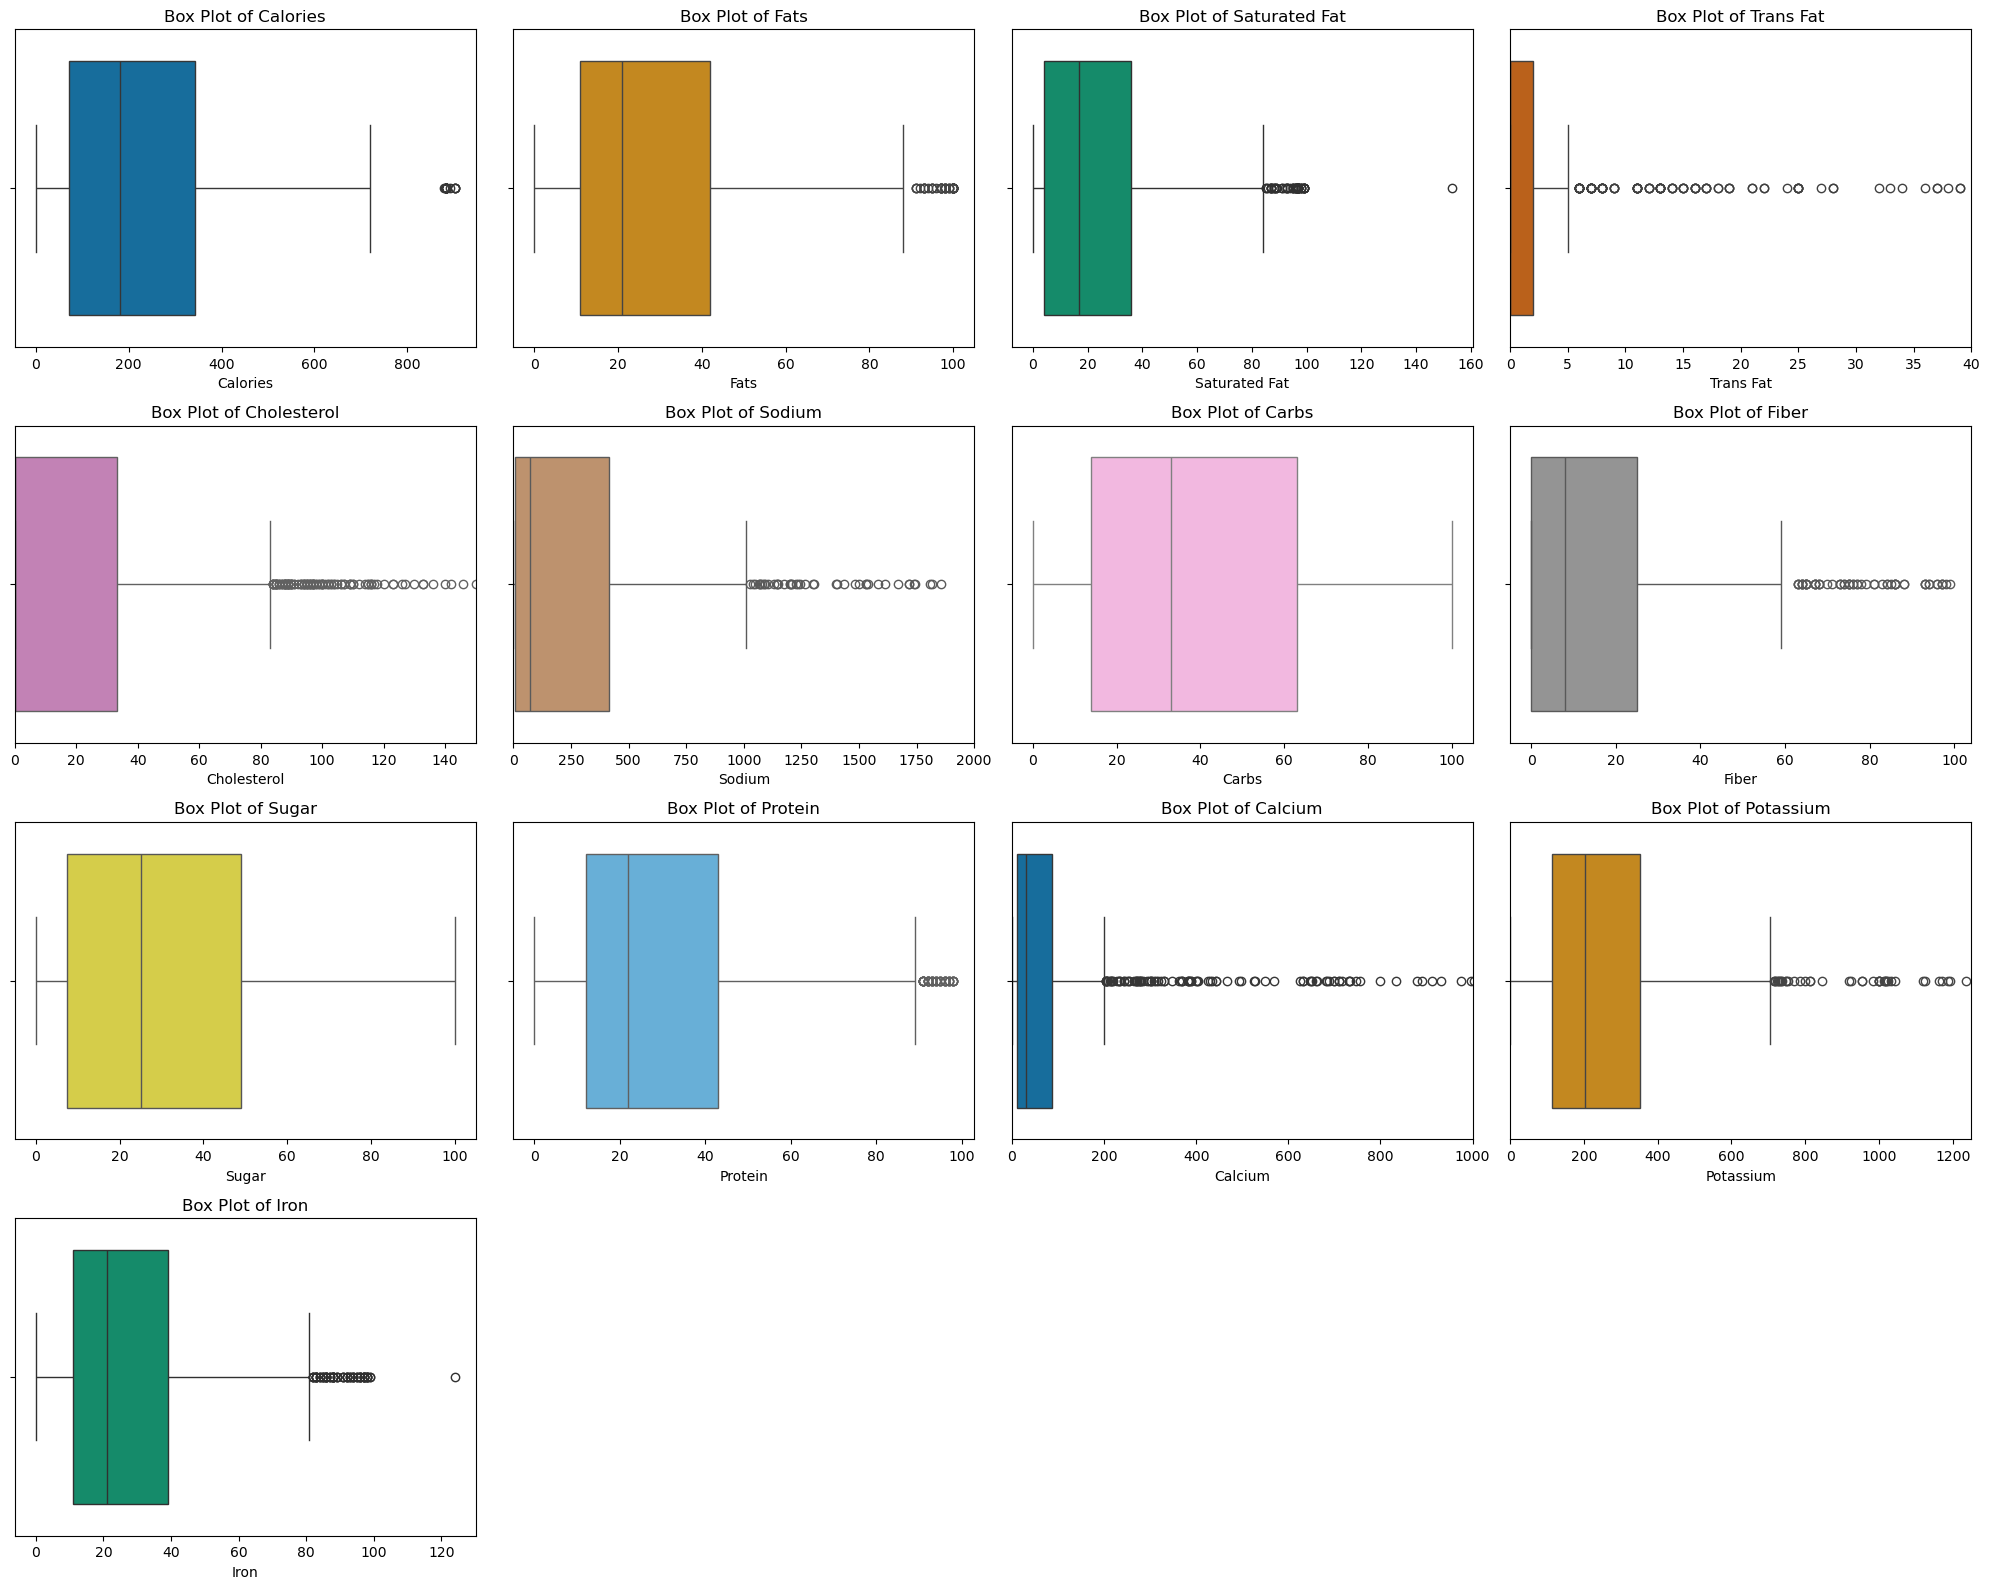

In [88]:
# Box plots demonstrating distributions for each nutrient 

# Create subplots with 4 rows and 4 columns 
fig, axes = plt.subplots(4, 4, figsize = (20, 16))  # Adjust the figsize as needed

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

# Different colours for each boxplot
palette = sns.color_palette('colorblind', len(nutrients)) 

# y-axis limits for certain nutrients
y_axis_limits = {
    'Cholesterol': (0, 250),
    'Sodium': (0, 2000),
    'Potassium': (0, 1000),
    'Calcium': (0, 1250)
}

# y-axis limits for certain nutrients
x_axis_limits = {
    'Cholesterol': (0, 150),
    'Sodium': (0, 2000),
    'Potassium': (0, 1250),
    'Calcium': (0, 1000), 
    'Trans Fat': (0, 40)
}

# Loop through each feature and create a boxplot in the corresponding subplot
for i, nutrient in enumerate(nutrients):
    sns.boxplot(x = X[nutrient], ax = axes[i], color = palette[i])
    axes[i].set_title(f'Box Plot of {nutrient}')
    axes[i].set_xlabel(nutrient)

    if nutrient in x_axis_limits:
        axes[i].set_xlim(x_axis_limits[nutrient]) 
        
# Remove any unused subplots if there are fewer than 12 features
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

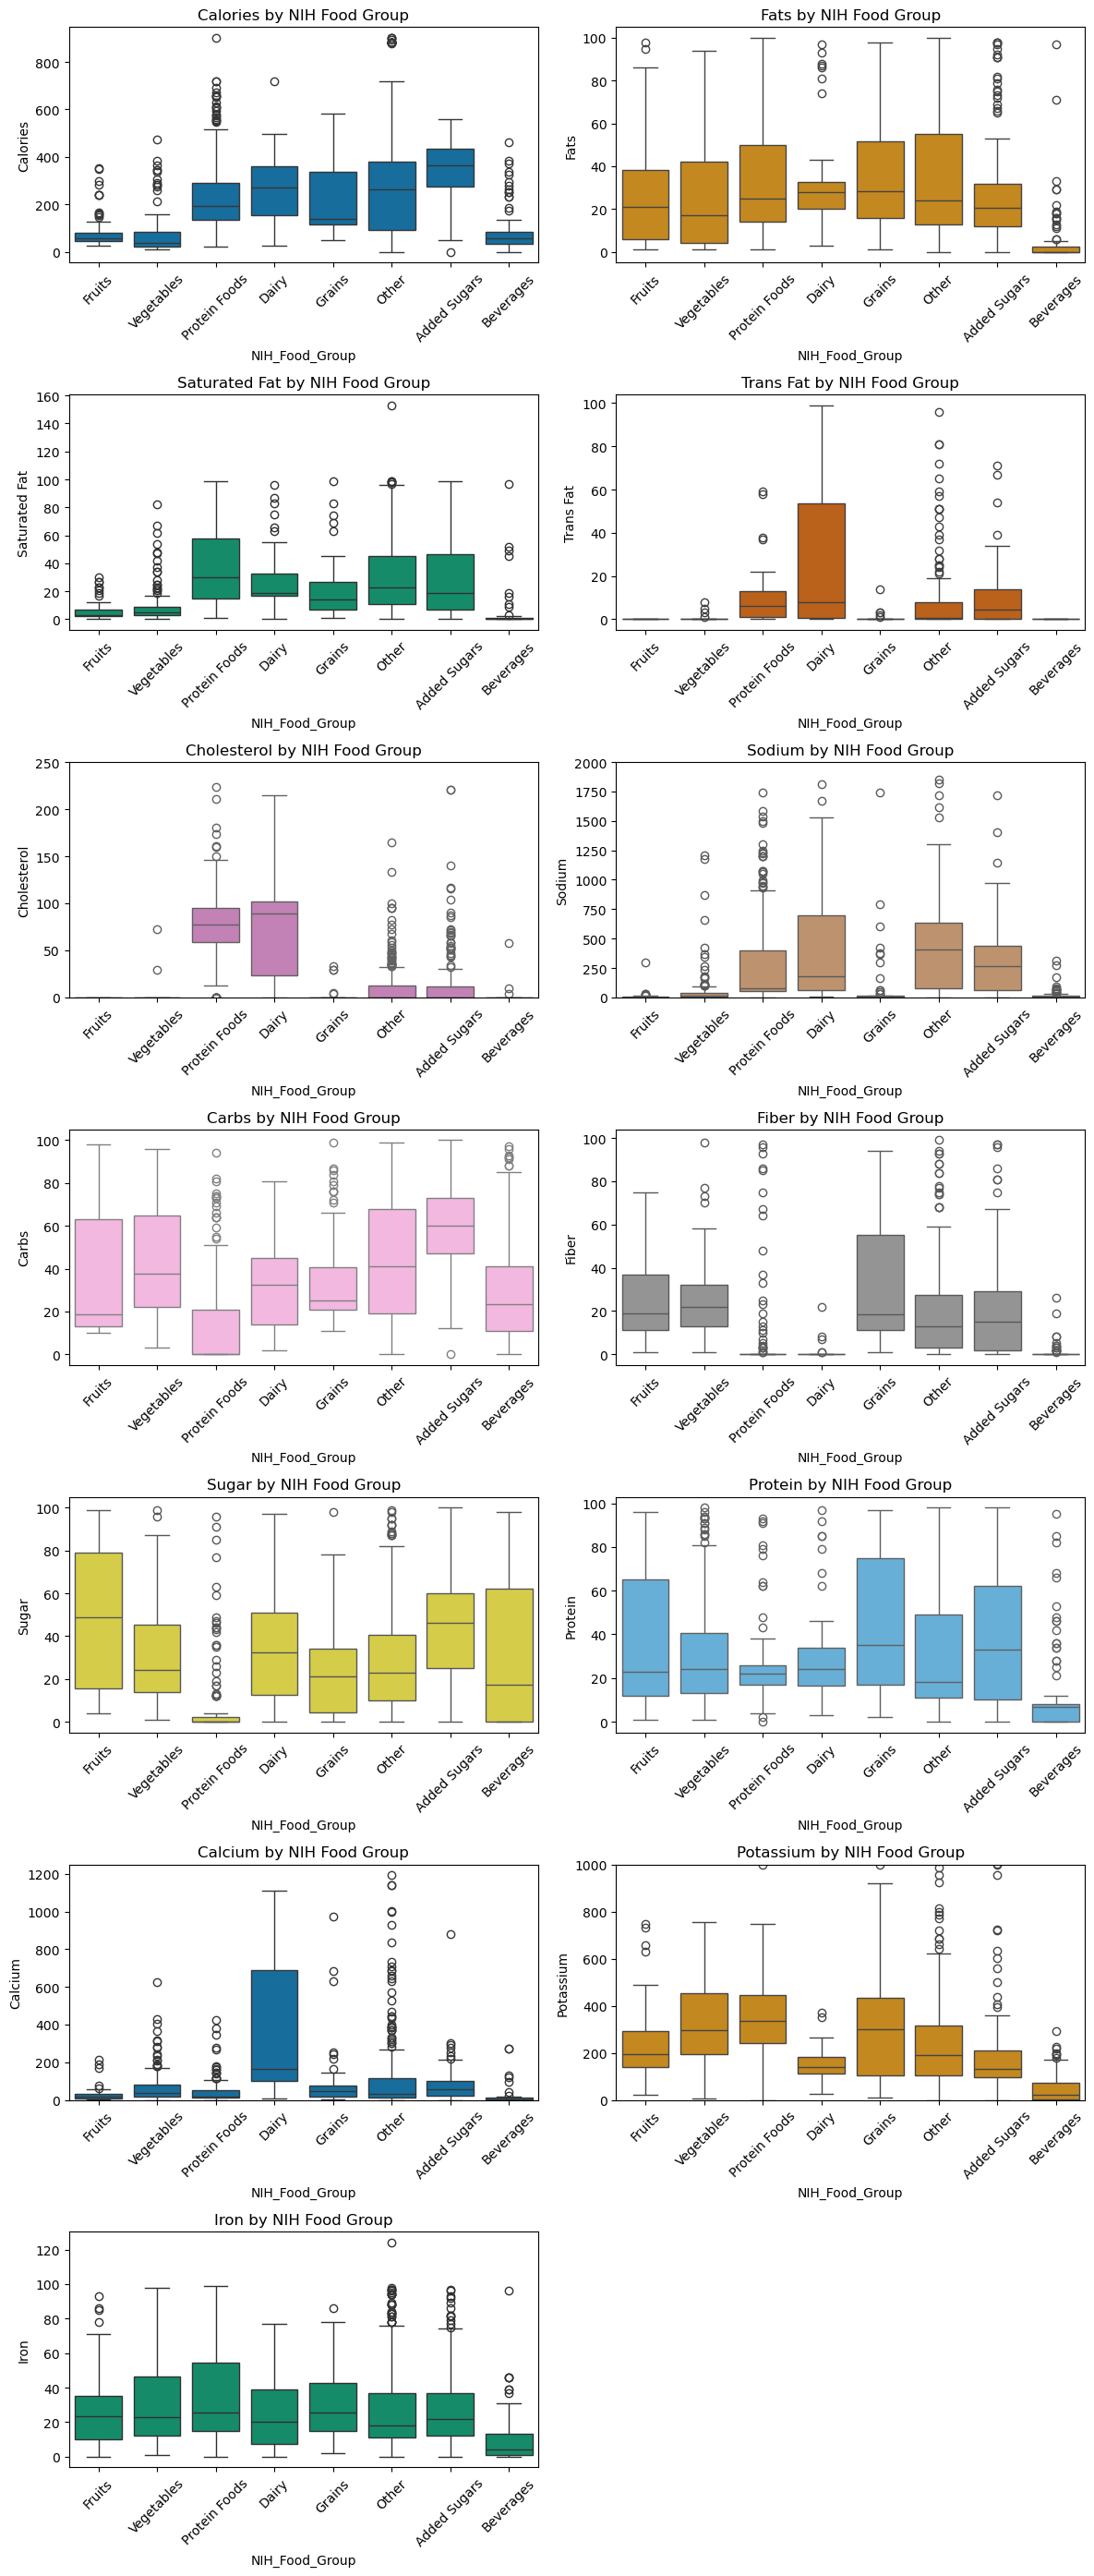

In [89]:
# Box plots demonstrating distributions for each nutrient for every food group 

# Create subplots with 2 rows and 7 columns
fig, axes = plt.subplots(7, 2, figsize = (12, 28))  # Adjust figsize as necessary

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

# Different colours for each boxplot
palette = sns.color_palette('colorblind', len(nutrients))

# y-axis limits for certain nutrients
y_axis_limits = {
    'Cholesterol': (0, 250),
    'Sodium': (0, 2000),
    'Potassium': (0, 1000),
    'Calcium': (0, 1250)
}

# Loop through each nutrient and create a boxplot in the corresponding subplot
for i, nutrient in enumerate(nutrients):
    sns.boxplot(x = 'NIH_Food_Group', y = nutrient, data = nih_food_data, color = palette[i], ax = axes[i])
    axes[i].set_title(f'{nutrient} by NIH Food Group')
    axes[i].set_ylabel(nutrient)
    axes[i].tick_params(axis='x', rotation=45)
    
    if nutrient in y_axis_limits:
        axes[i].set_ylim(y_axis_limits[nutrient])

# Remove any extra subplots if there are fewer than 14 nutrients
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [94]:
from scipy.stats import kruskal

# Perform Kruskal-Wallis H test
kruskal_result = kruskal(nih_food_data[nih_food_data['NIH_Food_Group'] == 'Fruits']['Calories'],
                         nih_food_data[nih_food_data['NIH_Food_Group'] == 'Vegetables']['Fats'],
                         nih_food_data[nih_food_data['NIH_Food_Group'] == 'Protein Foods']['Iron'])

# Print the results
print(f'Kruskal-Wallis Test Statistic: {kruskal_result.statistic}, p-value: {kruskal_result.pvalue}')

from scipy.stats import levene

# Perform Levene's test to compare variances of 'Calories' across different food groups
levene_stat, p_value = levene(
    nih_food_data[nih_food_data['NIH_Food_Group'] == 'Fruits']['Calories'],
    nih_food_data[nih_food_data['NIH_Food_Group'] == 'Vegatables']['Calories'],
    nih_food_data[nih_food_data['NIH_Food_Group'] == 'Protein Foods']['Calories'],
    nih_food_data[nih_food_data['NIH_Food_Group'] == 'Dairy']['Calories'],
    nih_food_data[nih_food_data['NIH_Food_Group'] == 'Grains']['Calories'],
    nih_food_data[nih_food_data['NIH_Food_Group'] == 'Other']['Calories'],
    nih_food_data[nih_food_data['NIH_Food_Group'] == 'Added Sugars']['Calories'],
    nih_food_data[nih_food_data['NIH_Food_Group'] == 'Beverages']['Calories'],
)

# Print the test statistic and p-value
print(f"Levene's Test Statistic: {levene_stat}, p-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The variances between groups are significantly different.")
else:
    print("The variances between groups are not significantly different.")


Kruskal-Wallis Test Statistic: 99.13666890624802, p-value: 2.9699276514744526e-22
Levene's Test Statistic: nan, p-value: nan
The variances between groups are not significantly different.


/Users/armanhundal/miniconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/armanhundal/miniconda3/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


                         sum_sq      df          F        PR(>F)
C(NIH_Food_Group)  1.157315e+07     7.0  66.559926  8.989221e-81
Residual           2.888821e+07  1163.0        NaN           NaN
          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
    group1        group2     meandiff p-adj    lower     upper   reject
-----------------------------------------------------------------------
 Added Sugars     Beverages  -262.642    0.0 -324.7721  -200.512   True
 Added Sugars         Dairy  -89.9158 0.0034 -161.2062  -18.6255   True
 Added Sugars        Fruits -269.6318    0.0 -330.7563 -208.5072   True
 Added Sugars        Grains -142.4007    0.0 -210.2513  -74.5501   True
 Added Sugars         Other  -68.0437 0.0001 -111.4559  -24.6315   True
 Added Sugars Protein Foods -105.7825    0.0  -152.945    -58.62   True
 Added Sugars    Vegetables   -280.65    0.0 -331.4754 -229.8246   True
    Beverages         Dairy  172.7262    0.0   91.0258  254.4266   True
    Beverages

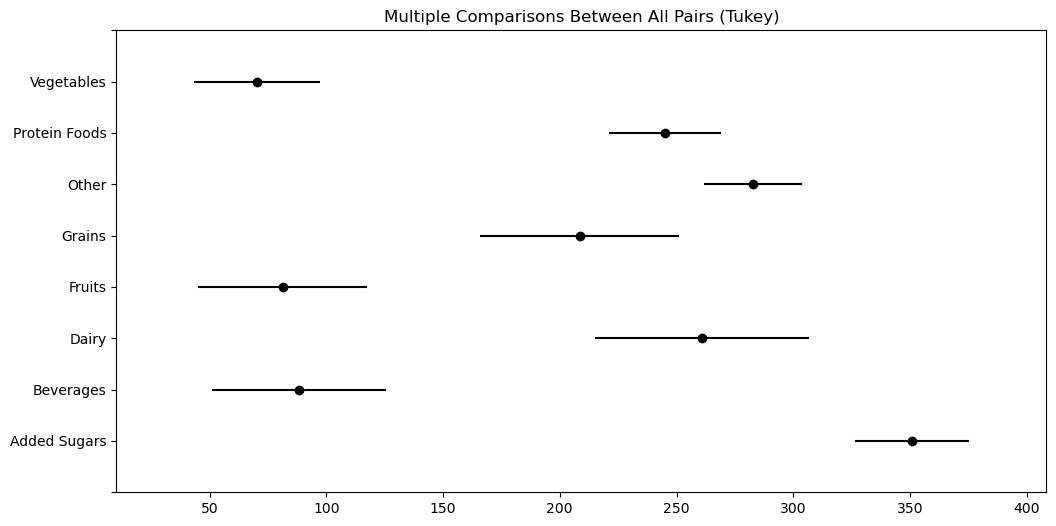

In [97]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform ANOVA (already assumed that you've checked this)
model = sm.formula.ols('Calories ~ C(NIH_Food_Group)', data=nih_food_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

# If ANOVA is significant, proceed with Tukey's HSD test for pairwise comparison
tukey = pairwise_tukeyhsd(endog=nih_food_data['Calories'],     # Dependent variable
                          groups=nih_food_data['NIH_Food_Group'],  # Independent variable (categorical)
                          alpha=0.05)  # Significance level

# Print the results
print(tukey)

# Plot the results
tukey.plot_simultaneous(figsize=(12, 6))
plt.show()
